In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path

In [2]:
dfs = {}

for file in Path(".").glob("*.csv"):
    print(f"Loading {file.name}")
    s = file.name.split('_')[0]
    dfs[s] = pd.read_csv(file.name)
    dfs[s]['Datetime'] = pd.to_datetime(dfs[s]['Datetime'])
    dfs[s].sort_values("Datetime", inplace=True)
    
    # Normalise the data per column
    mw_usage_column: str = dfs[s].columns[1]
    dfs[s][mw_usage_column] = dfs[s][mw_usage_column] / max(dfs[s][mw_usage_column])

Loading AEP_hourly.csv
Loading PJMW_hourly.csv
Loading PJME_hourly.csv
Loading PJM_Load_hourly.csv
Loading EKPC_hourly.csv
Loading COMED_hourly.csv
Loading DOM_hourly.csv
Loading DAYTON_hourly.csv
Loading NI_hourly.csv
Loading DUQ_hourly.csv
Loading DEOK_hourly.csv
Loading FE_hourly.csv
Loading pjm_hourly_est.csv


In [3]:
to_concat = []
for name, df in dfs.items():
    if (name + '_MW') in df:
        c = df.copy()
        c['Provider'] = name
        to_concat.append(c)
dfs['ALL'] = pd.concat(to_concat)
dfs['ALL']

,Datetime,AEP_MW,Provider,PJMW_MW,PJME_MW,EKPC_MW,COMED_MW,DOM_MW,DAYTON_MW,NI_MW,DUQ_MW,DEOK_MW,FE_MW
2183,2004-10-01 01:00:00,0.481767,AEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2184,2004-10-01 02:00:00,0.464487,AEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2185,2004-10-01 03:00:00,0.455030,AEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2186,2004-10-01 04:00:00,0.451333,AEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2187,2004-10-01 05:00:00,0.454602,AEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57758,2018-08-02 20:00:00,NaN,FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.703107
57759,2018-08-02 21:00:00,NaN,FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.688141
57760,2018-08-02 22:00:00,NaN,FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.679304
57761,2018-08-02 23:00:00,NaN,FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.632269


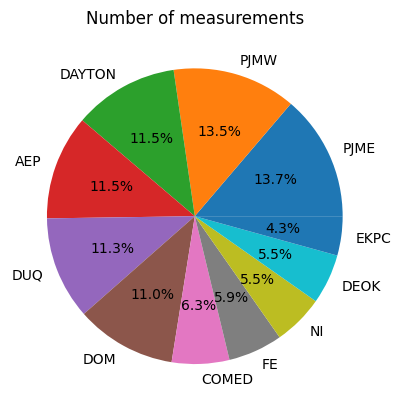

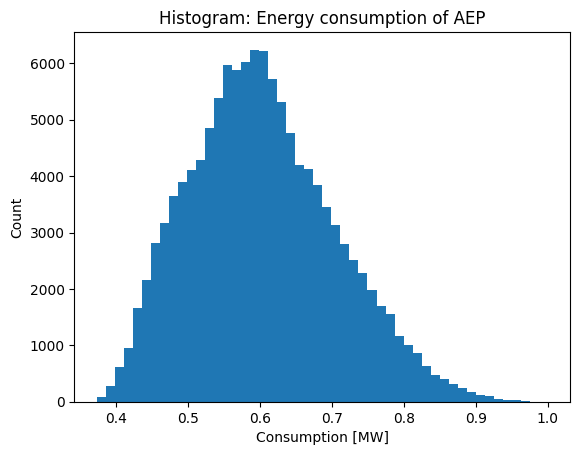

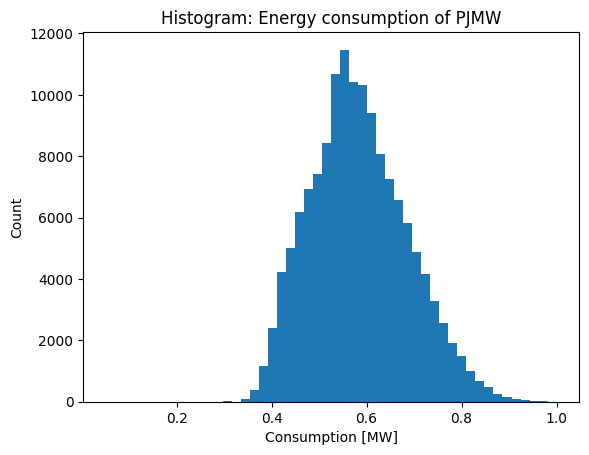

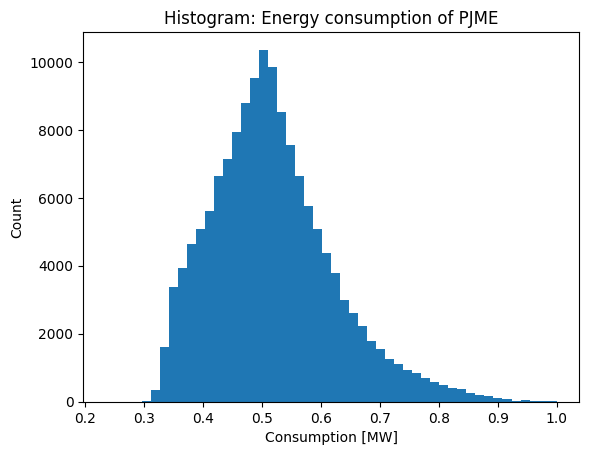

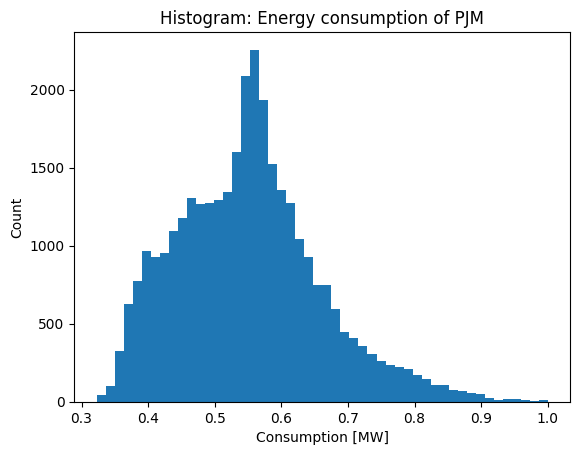

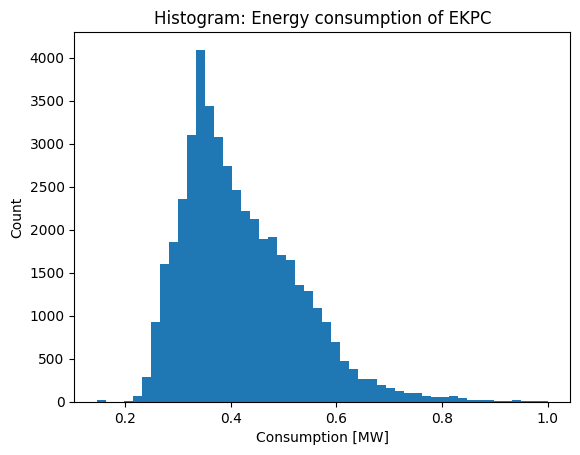

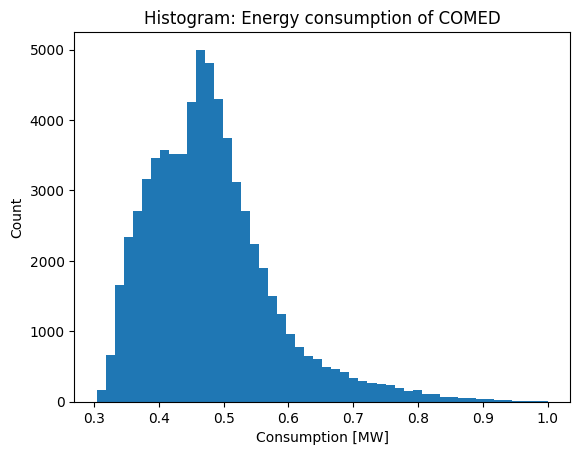

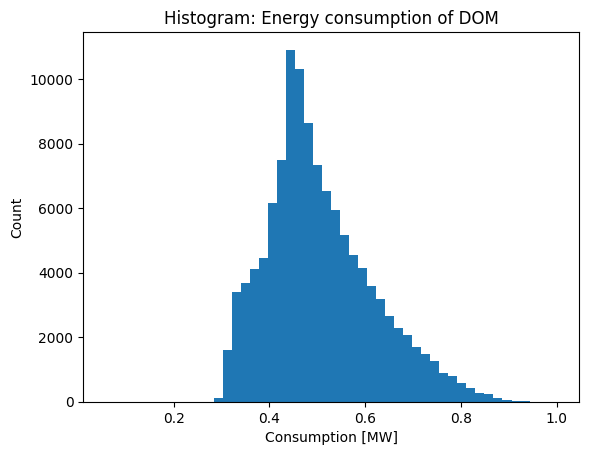

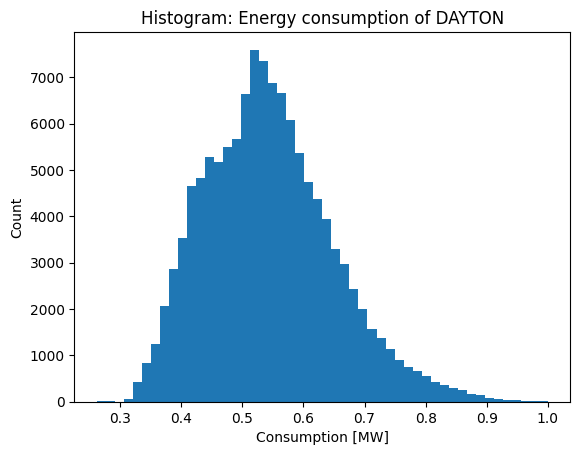

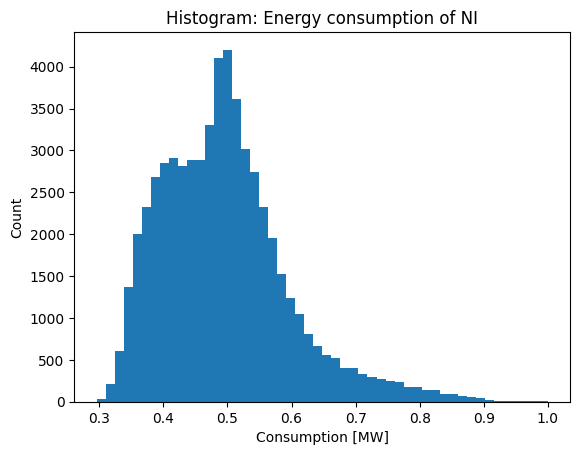

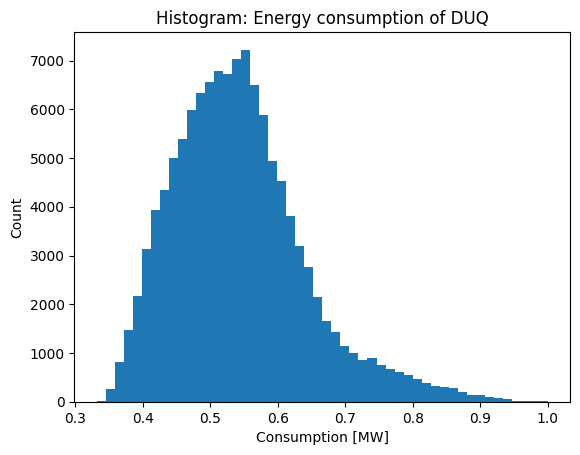

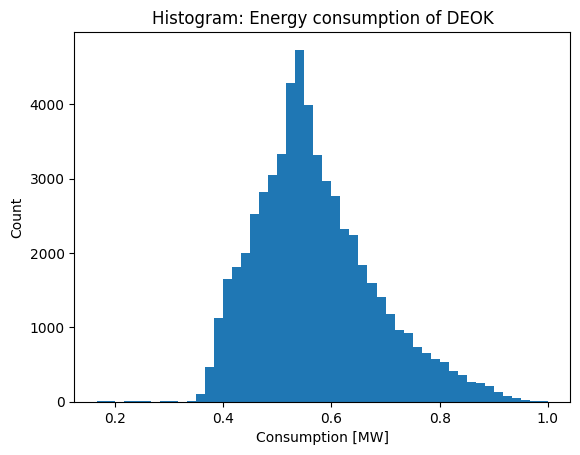

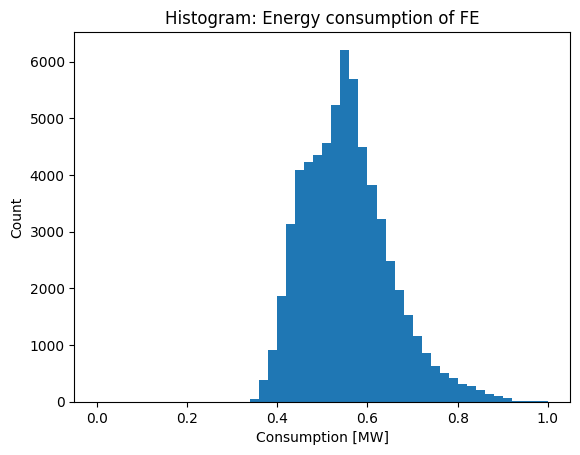

/home/jupyter/.cache/pypoetry/virtualenvs/notebook-tGyJOL9c-py3.10/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/jupyter/.cache/pypoetry/virtualenvs/notebook-tGyJOL9c-py3.10/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

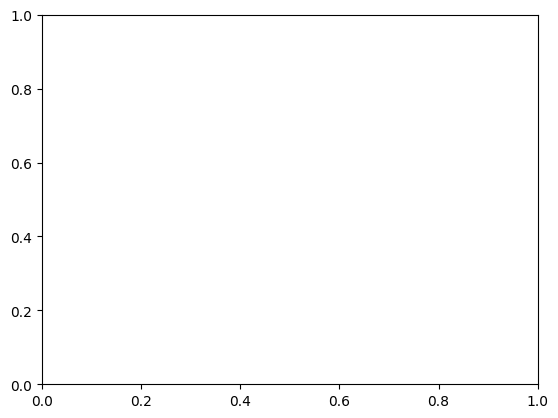

In [4]:
# counts = [ df.count() for df in dfs.items() ]
value_counts = dfs['ALL']["Provider"].value_counts()

# dir(value_counts)
# value_counts[0]


# value_counts["Provider"]
fig, ax = plt.subplots()
ax.pie( [ v[1] for v in value_counts.items()] , autopct='%1.1f%%', labels=[v[0] for v in value_counts.items()])
# ax.legend(loc='upper left')
ax.set_title("Number of measurements")

# Rozkład normalny wszystkiego i per plik
# Histogram dla każdego pliku osobno i całości
for s, df in dfs.items():
    fig, ax = plt.subplots()
    ax.hist(df.iloc[:, 1], bins=50)
    ax.set_ylabel('Count')
    ax.set_xlabel('Consumption [MW]')
    ax.set_title(f'Histogram: Energy consumption of {s}')
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.show()


In [5]:
# for s, df in dfs.items():
    #fig, ax = plt.subplots()
    #ax.hist(df.iloc[:, 1], bins=50)
    #ax.set_ylabel('Count')
    #ax.set_xlabel('Consumption [MW]')
    #ax.set_title(f'Histogram: Energy consumption of {s}')
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    #plt.show()
    

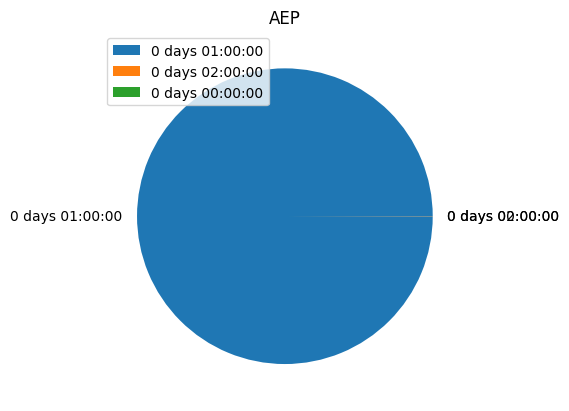

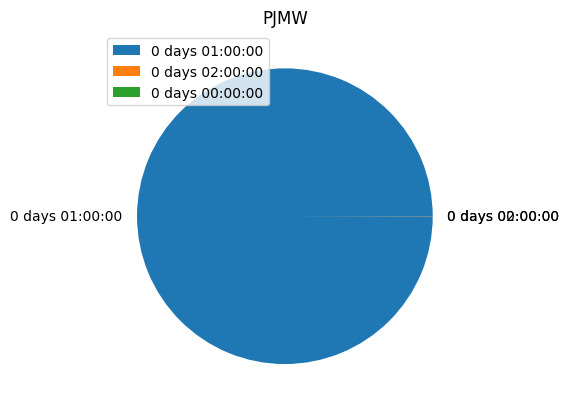

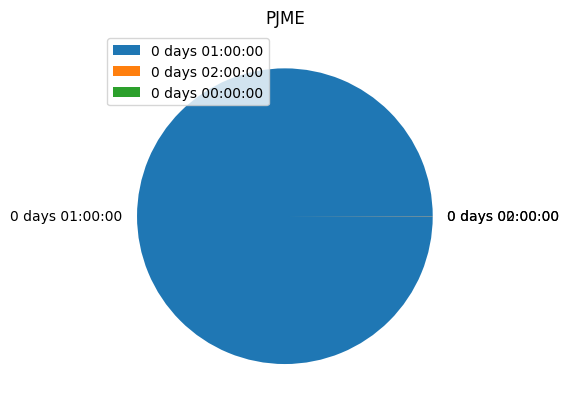

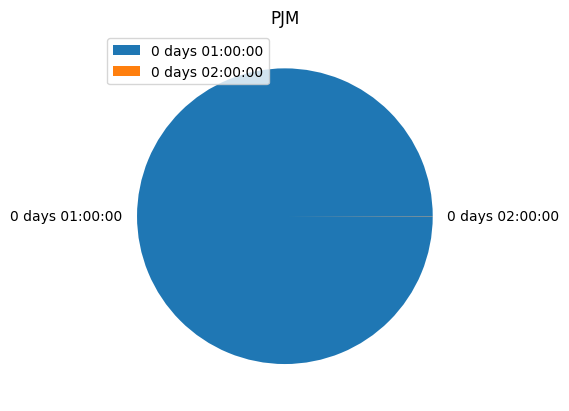

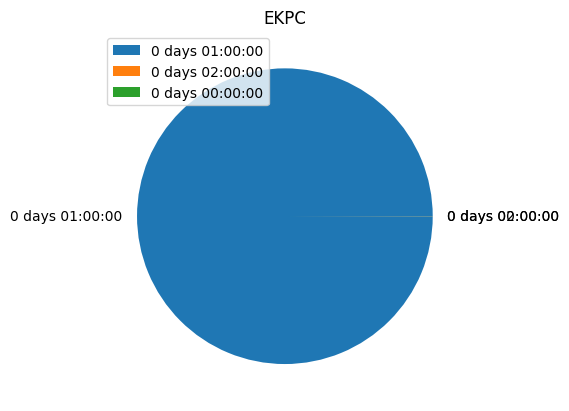

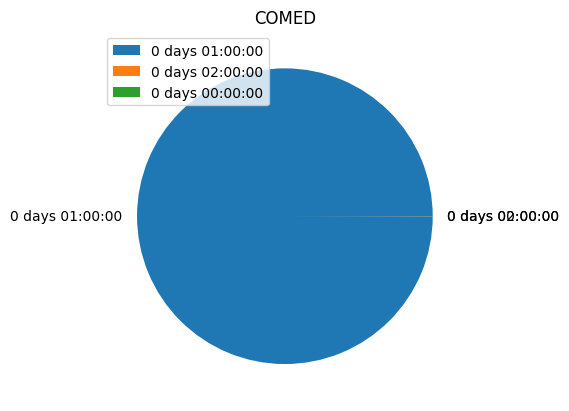

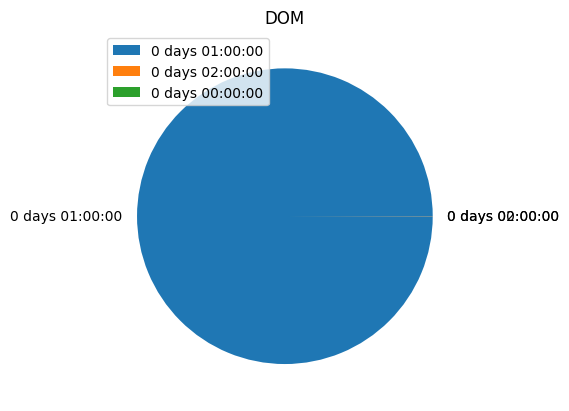

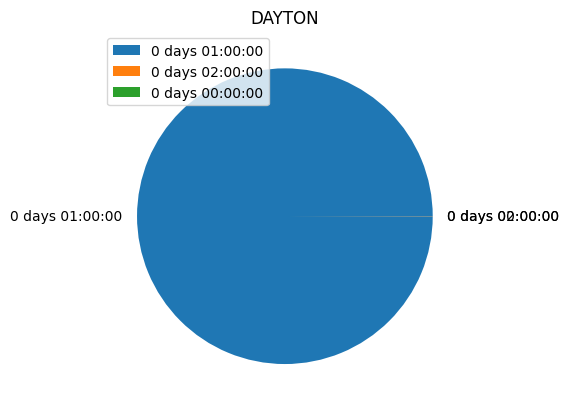

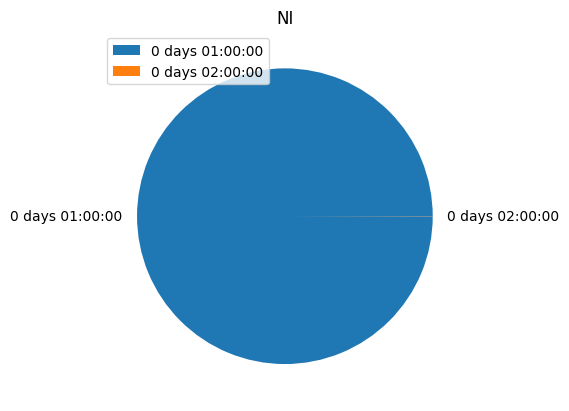

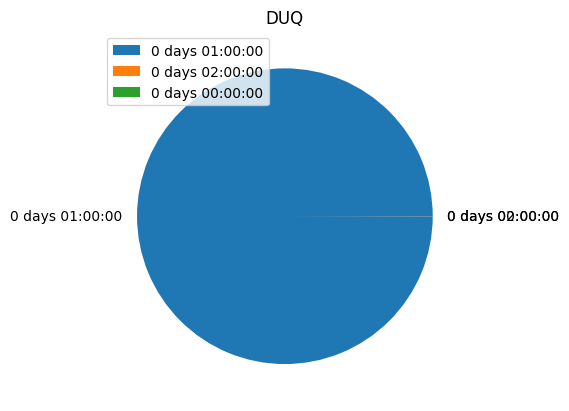

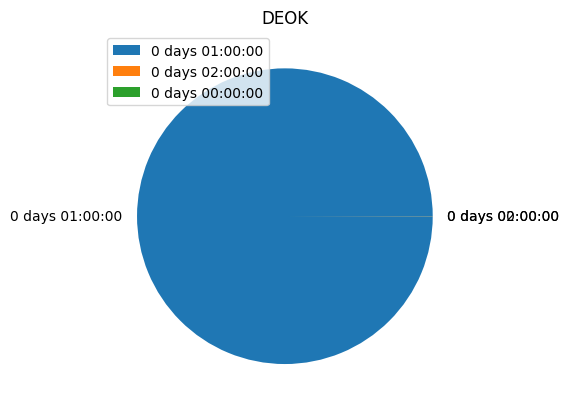

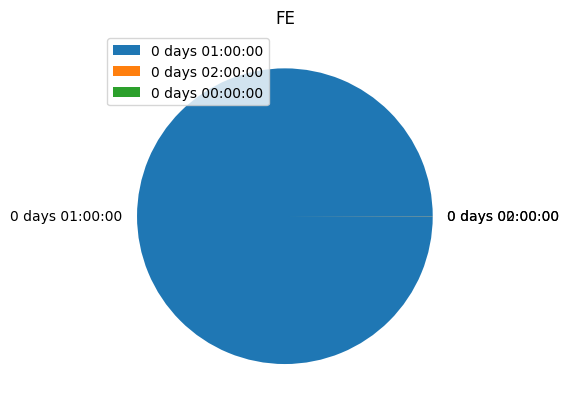

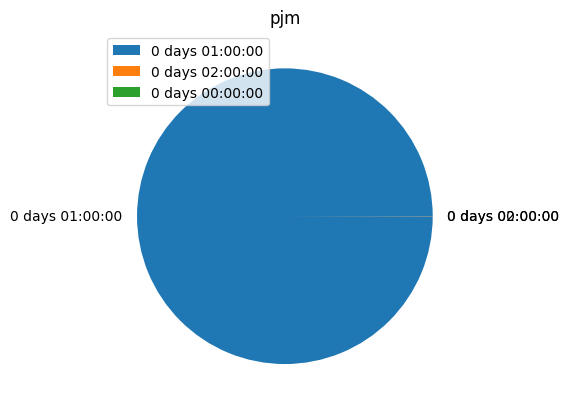

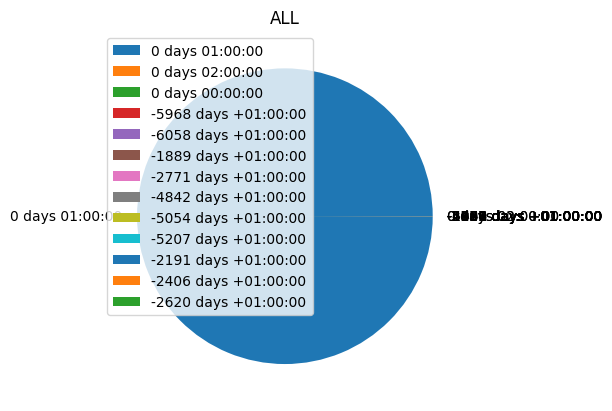

In [5]:
# Ciągłość czasowa wszystkiego i per plik
def check_consistency(df):
    return df['Datetime'].diff().value_counts()

for name, df in dfs.items():
    # print('-----', name, '---------')
    consistency = check_consistency(df)
    # display(consistency)
    fig, ax = plt.subplots()
    ax.pie(consistency, labels=list(consistency.keys()))
    ax.legend(loc='upper left')
    ax.set_title(name)
    # break

In [6]:
# Check for null values
for file_name, df in dfs.items():
    for column in val.columns:
        if any(val[column].isnull()):
            print(f"Column {column} in {file_name} contains null values")
        else:
            print(f"Column {column} in {file_name} contains no null values")

NameError: name 'val' is not defined

In [8]:
aep = dfs['AEP']
aep

In [185]:
aep_df = dfs["AEP"]

trim = 24*365*100

plt.plot(aep_df["Datetime"][:trim], aep_df["AEP_MW"][:trim])
plt.xticks(rotation = 45)
plt.show()

In [7]:
##
def get_compressed():
    for key, df in dfs.items():
        diffs = df[df.columns[1]].diff()
        df['increasing'] = diffs >= 0

get_compressed()

In [8]:
# df[df['rate'] == True]

KeyError: 'rate'

In [ ]:
dataset = []


In [11]:
# ♫♫♫ Tutaj Baczek ma swoj kawalek podlogi
# Nie mów mu co ma robić ♫♫♫
aep_df = dfs["AEP"]["AEP_MW"]
aep_df
# np.array_split(aep_df["AEP_MW"], 1000)

index = 0
window_size = 100

X = []
y = []

while True:
    shift = index * window_size
    window = aep_df[shift:shift+window_size]
    # print(window)
    # break
    if len(window) != window_size:
        break
    # print(window)
    
    known_values = window[:window_size-1].values
    X.append(known_values)
    next_value = window[:window_size-1:window_size].values[0]
    
    if next_value > known_values[-1]:
        about_to_increase = True    
    else:
        about_to_increase = False
        
    y.append(about_to_increase)
    # y.append(next_value)
    # print(next_value)
    # print(known_values[-1], next_value, about_to_increase)
    index += 1
    # print(X[-1][-1], y[-1])
    # print(X)
    # # print(y)
    # if len(y) > 10000:
    #     break
    
# print(y)


In [12]:
X[0][-1], y[0]

(0.46413699163261335, True)

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
# from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)
# clf = MLPClassifier(random_state=1, hidden_layer_sizes=(70,50,), max_iter=200).fit(X_train, y_train)
clf = LinearSVC(max_iter=200).fit(X_train, y_train)
# clf.predict_proba(X_test[:1])

# clf.predict(X_test[:5, :])

clf.score(X_test, y_test)

/home/jupyter/.cache/pypoetry/virtualenvs/notebook-tGyJOL9c-py3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9438943894389439

In [44]:
# clf.predict(X)
# X_test
clf.classes_
# X_test[0]

array([False,  True])

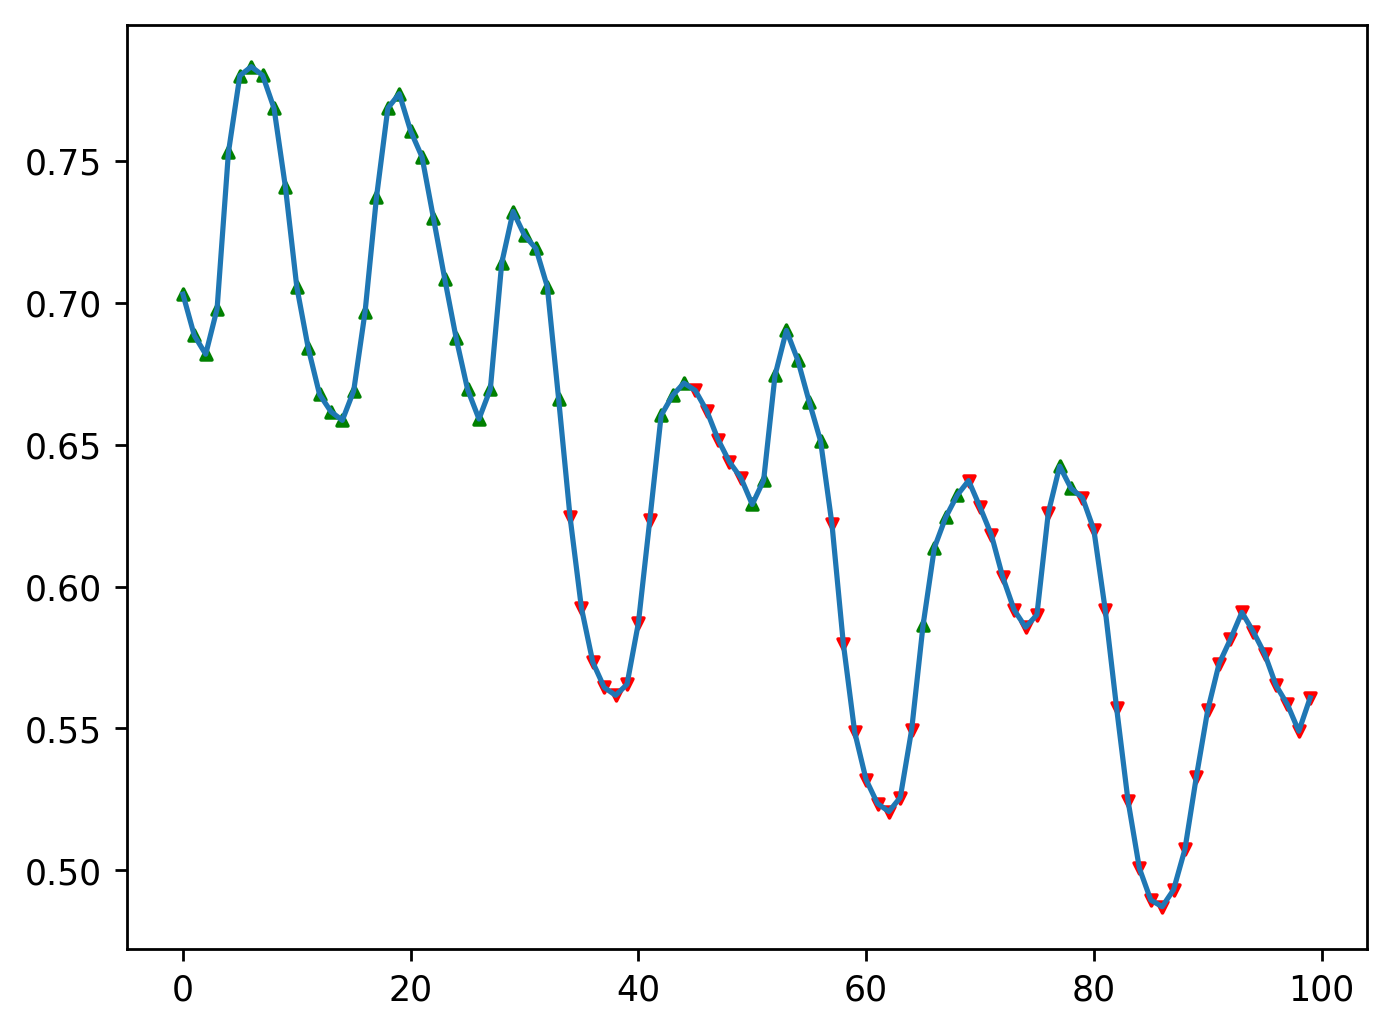

In [49]:
from itertools import count
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 250

# plt.plot( datetimes, values )
    
# for i in aep_df

values = aep_df.values[2000:2200]
# val
trim_left = 100

for i in range(len(values)):
    if i < trim_left:
        continue
    value = clf.predict([values[i-99:i]])
    # probability = clf.predict_proba([values[i-99:i]])
    probability = [[0.1, 0.1]]
    if value: #== (values[i] > values[i-1]):
        plt.scatter(i-trim_left, values[i], color="r", marker="v", s=probability[0][1]*100)
    else:
        plt.scatter(i-trim_left, values[i], color="g", marker="^", s=probability[0][0]*100)

# clf.predict([values[:99]])

plt.plot(values[trim_left:])
